In [1]:
import os
import glob
import numpy as np
import time

from six import BytesIO

import matplotlib.pyplot as plt
import cv2
from PIL import Image
from object_detection.utils import visualization_utils as viz_utils

import tensorflow as tf

In [28]:
ROOT_PATH = '/home/user/Helipad_Detection'

In [132]:
MODEL_NAME = 'stanford_SSD_RESN_v1_1024x1024'

MODEL_PATH = os.path.join(ROOT_PATH, 'workspace/exported-models', MODEL_NAME)
# IMAGE_PATH = os.path.join(ROOT_PATH, 'workspace/images/stanford/test')
IMAGE_PATH = os.path.join(ROOT_PATH, 'workspace/images/inf')

print(MODEL_PATH)
print(IMAGE_PATH)

/home/user/Helipad_Detection/workspace/exported-models/stanford_SSD_RESN_v1_1024x1024
/home/user/Helipad_Detection/workspace/images/inf


### Load Model

In [106]:
def load_model(model_path):
    start_time = time.time()
    tf.keras.backend.clear_session()
    detect_fn = tf.saved_model.load(model_path + '/saved_model')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print('Elapsed time: ' + str(elapsed_time) + 's')
    return detect_fn

In [107]:
detect_fn = load_model(MODEL_PATH)

Elapsed time: 10.398330926895142s


### Load Sample Images

In [170]:
IMAGE_LIST = []
for ext in ('*.jpg', '*.jpeg', '*.png'):
    IMAGE_LIST.extend(glob.glob(os.path.join(IMAGE_PATH, ext)))

In [171]:
random_samples = np.random.choice(IMAGE_LIST, 3, replace=False)
random_samples

array(['/home/user/Helipad_Detection/workspace/images/inf/aerial-pedestrians-casting-long-shadows-frankfurt-germany-march-walking-around-late-afternoon-sun-33900047.jpg',
       '/home/user/Helipad_Detection/workspace/images/inf/photo-1548783307-f63adc3f200b.jpeg',
       '/home/user/Helipad_Detection/workspace/images/inf/depositphotos_224661960-stock-photo-aerial-violation-traffic-rules-car.jpg'],
      dtype='<U160')

### Inference

In [184]:
sample_idx = 1

category_index = {1 : {'id' : 1, 'name':'helipad'}, 
                  2 : {'id' : 2, 'name':'Pedestrian'}, 
                  3 : {'id' : 3, 'name':'Biker'}, 
                  4 : {'id' : 4, 'name':'Skater'}, 
                  5 : {'id' : 5, 'name':'Cart'}, 
                  6 : {'id' : 6, 'name':'Bus'}, 
                  7 : {'id' : 7, 'name':'Car'}}

In [185]:
image_np = cv2.imread(random_samples[sample_idx])
image_np_with_detections = image_np.copy()

In [186]:
input_tensor = np.expand_dims(image_np, 0)

In [187]:
detections = detect_fn(input_tensor)

In [188]:
viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        detections['detection_classes'][0].numpy().astype(np.int32),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.40,
        agnostic_mode=False)

array([[[241, 237, 236],
        [170, 166, 165],
        [ 69,  65,  64],
        ...,
        [142, 139, 135],
        [136, 132, 131],
        [118, 114, 113]],

       [[154, 150, 149],
        [ 82,  78,  77],
        [130, 126, 125],
        ...,
        [138, 135, 131],
        [120, 116, 115],
        [141, 137, 136]],

       [[122, 118, 117],
        [ 91,  87,  86],
        [135, 131, 130],
        ...,
        [128, 125, 121],
        [143, 140, 136],
        [129, 126, 122]],

       ...,

       [[ 86,  87,  85],
        [ 55,  56,  54],
        [ 40,  41,  39],
        ...,
        [ 89,  87,  86],
        [ 97,  95,  94],
        [108, 106, 105]],

       [[ 83,  81,  80],
        [ 82,  80,  79],
        [ 69,  67,  66],
        ...,
        [ 82,  80,  79],
        [ 87,  85,  84],
        [ 88,  86,  85]],

       [[ 59,  57,  56],
        [ 66,  64,  63],
        [ 66,  64,  63],
        ...,
        [ 91,  89,  88],
        [ 87,  85,  84],
        [ 83,  81,  80]]

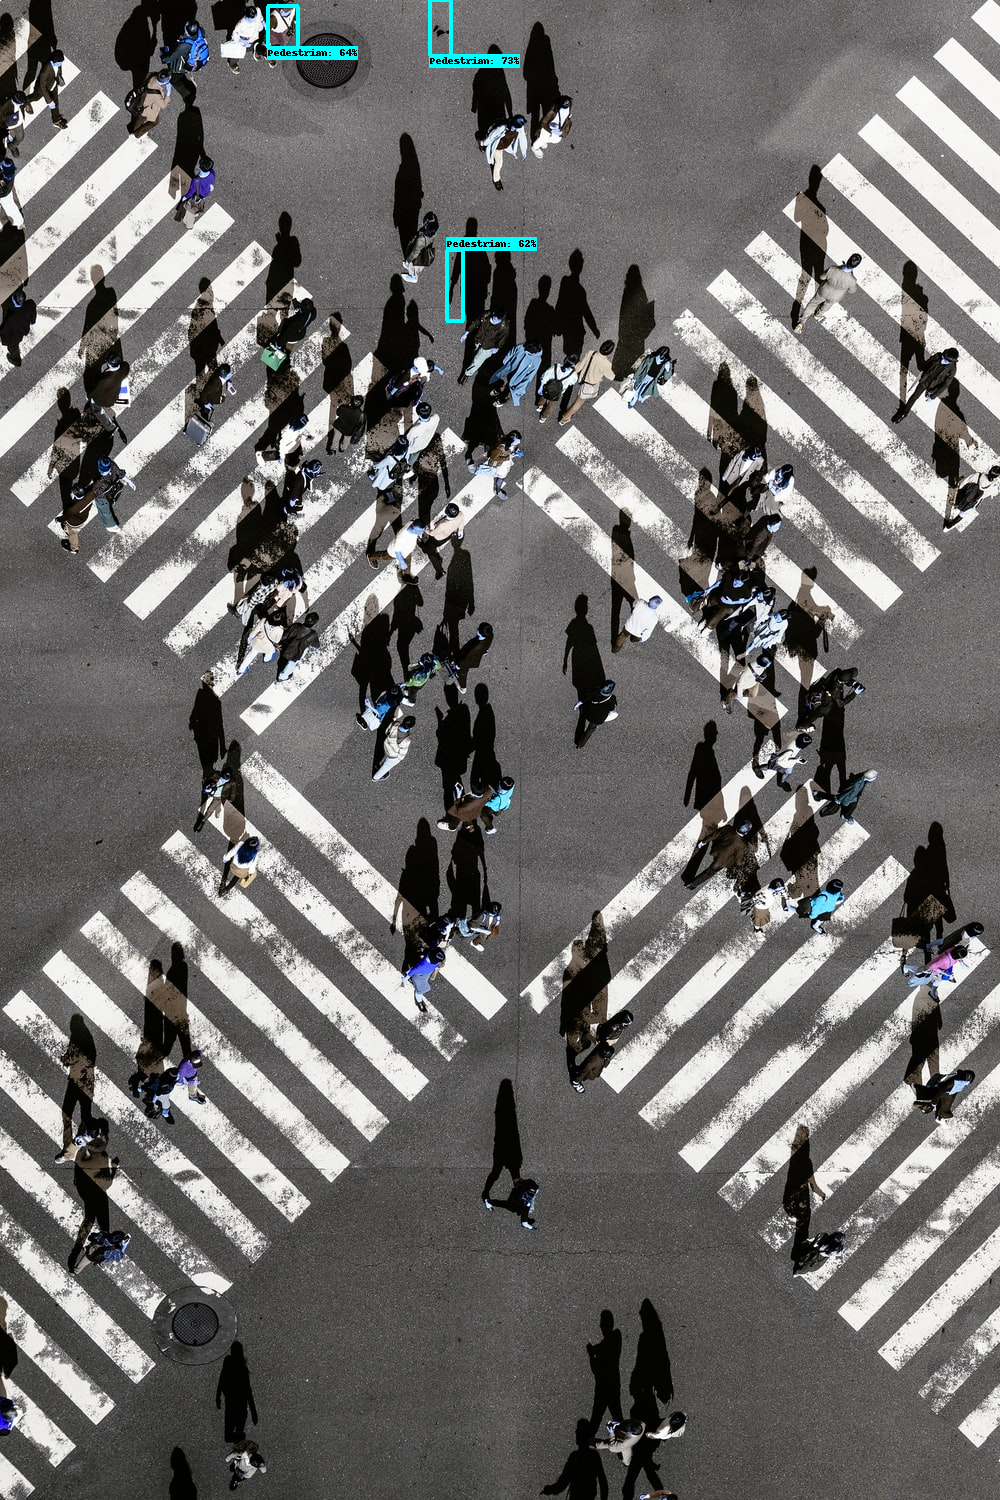

In [189]:
Image.fromarray(image_np_with_detections)